<a href="https://colab.research.google.com/github/kvsheejith1984/DO180-apps/blob/master/Session_9_MLFLOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# Step 1: Data collection
df = pd.read_csv(r'/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#df['target'] --> create a machine learning model --> which will give the best f1-score

# what type of ML problem is this dataset ?

# Do you want to try to create a ML model yoursefl ? GenAI ?

# do the EDA of the dataset --> can you send me the code --> 08:31 am Time given

#Step 2:  data cleaning

print(df.isnull().sum())
print(df.info())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


## Exploratory Data Analysis (EDA)

In [ ]:
# Display descriptive statistics
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Display value counts for categorical columns (assuming 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target' are categorical or can be treated as such)
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for col in categorical_cols:
    if col in df.columns:
        print(f"Value counts for column '{col}':")
        display(df[col].value_counts())
        print("\n")

Value counts for column 'sex':


,count
sex,
1,207
0,96




Value counts for column 'cp':


,count
cp,
0,143
2,87
1,50
3,23




Value counts for column 'fbs':


,count
fbs,
0,258
1,45




Value counts for column 'restecg':


,count
restecg,
1,152
0,147
2,4




Value counts for column 'exang':


,count
exang,
0,204
1,99




Value counts for column 'slope':


,count
slope,
2,142
1,140
0,21




Value counts for column 'ca':


,count
ca,
0,175
1,65
2,38
3,20
4,5




Value counts for column 'thal':


,count
thal,
2,166
3,117
1,18
0,2




Value counts for column 'target':


,count
target,
1,165
0,138


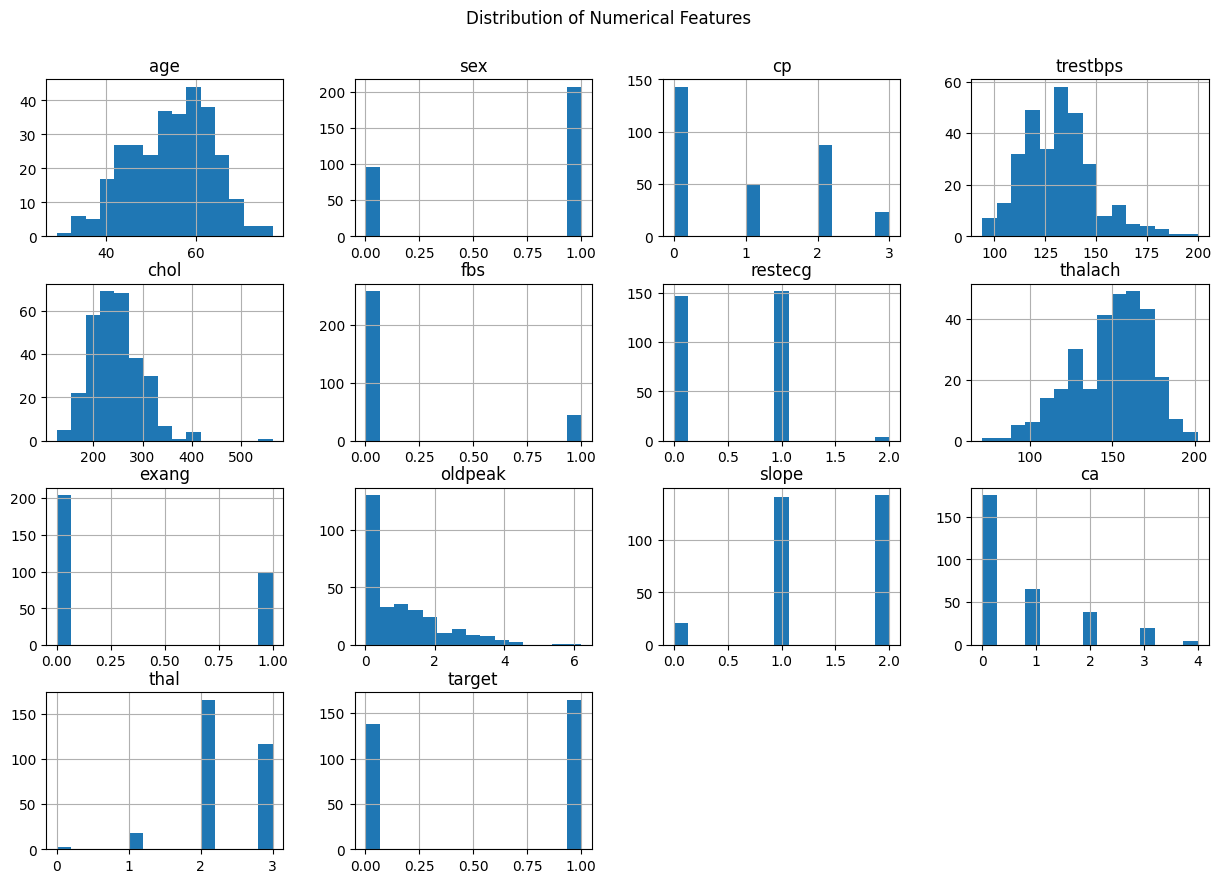

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of numerical features
df.hist(bins=15, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features", y=0.95)
plt.show()

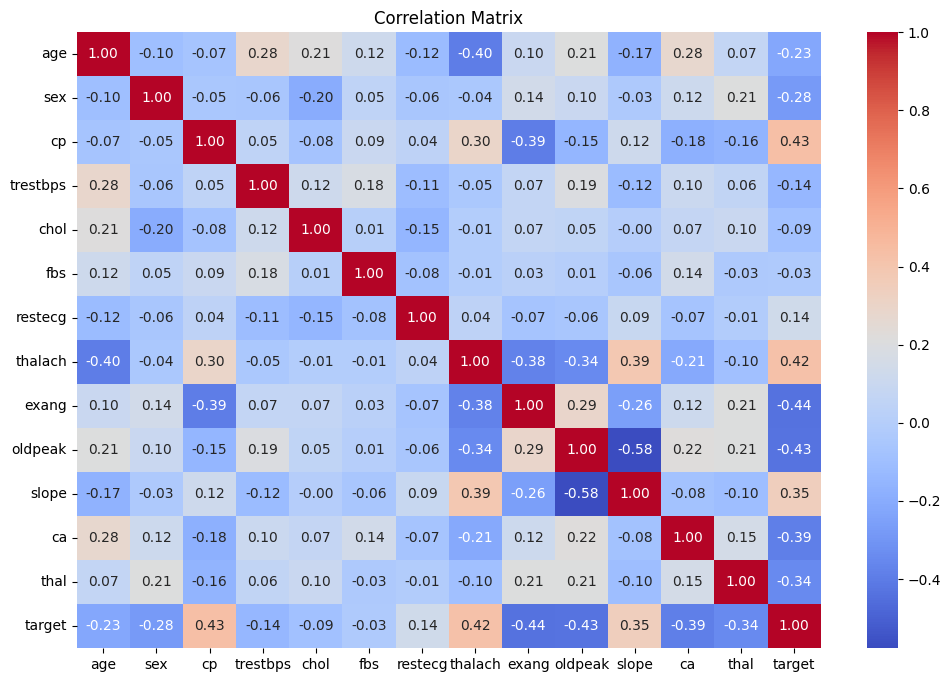

In [ ]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

This EDA provides insights into the distribution of features, potential outliers, and relationships between variables, which can be helpful for building a machine learning model.

In [ ]:
# Step 4: Data feature engineering

# scaling of the data, encoding -->




# Task
Perform feature engineering on the dataset.

## Identify feature types

### Subtask:
Determine which features in the DataFrame are numerical and which are categorical.


**Reasoning**:
Print the data types of the columns and then identify numerical and categorical columns based on the data types and previous EDA.



In [ ]:
print(df.info())

numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

print("\nNumerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Numerical columns: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Categorical columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


## Handle categorical features

### Subtask:
Use appropriate encoding techniques (e.g., one-hot encoding) for categorical variables.


**Reasoning**:
Apply one-hot encoding to the categorical columns.



from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

df_categorical_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_cols]),
                                      columns=encoder.get_feature_names_out(categorical_cols))

display(df_categorical_encoded.head())

## Scale numerical features

### Subtask:
Apply scaling (e.g., standardization or normalization) to numerical features to bring them to a similar range.


**Reasoning**:
Apply standard scaling to the numerical features of the dataset.



from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_numerical = df[numerical_cols]

df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=numerical_cols)

display(df_numerical_scaled.head())

## Consider feature creation

### Subtask:
Based on the EDA, explore if new features can be created from existing ones to potentially improve model performance.


## Combine processed features

### Subtask:
Merge the processed numerical and categorical features into a single dataframe ready for model training.


**Reasoning**:
Merge the scaled numerical features and the one-hot encoded categorical features into a single DataFrame.



In [ ]:
#  step 5: Model selection / Step 7: hyperparameters tuning

# classification problem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

model = RandomForestClassifier(n_estimators = 500, criterion= 'gini')

In [ ]:
# step 6: Split our data into test-train
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train) # Ml model
y_pred_test = model.predict(X_test) # inferencing the trained model for X_test-->


# X--> are teh features (input)
# y --> output feature/target feature

In [ ]:
f1_score_test = f1_score(y_test, y_pred_test)
print("F1 Score:", f1_score_test)
accuracy_score_test = accuracy_score(y_test, y_pred_test)
print("Accuracy Score:", accuracy_score_test)

# f1-score , accuracy - score

F1 Score: 0.8787878787878788
Accuracy Score: 0.8688524590163934


In [ ]:
#range of f1-score --> 0 to 1 --> how is the ML  model performance--> decent

# criterion --> logloss instead of gini --> n_estimatore = 100 , 500
# tuning 10 times--> to maintain a log of the changes you are making in the model -->
# it would be difficult--> so for this we have mlflow -->

# f1-score --> during these runs-->

# use genai --> but can you create a model --> f1-score-test data >0.90
# you can tune the hyperparameters of RF --> you can try various other models --> >0.90

# different model : Use GENAI --> Support vector machine classifier, XGBOOST classifier, Logistic regression classifier

# also list the f1-score--> suggest which is the best model -->

#09:18---> 09:45--> wokring break --> suggest --> the model

In [ ]:
model2= DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_pred_test = model2.predict(X_test)
f1_score_test = f1_score(y_test, y_pred_test)
print("F1 Score:", f1_score_test)
accuracy_score_test = accuracy_score(y_test, y_pred_test)
print("Accuracy Score:", accuracy_score_test)

F1 Score: 0.8333333333333334
Accuracy Score: 0.8360655737704918


In [ ]:
# all a task -->